This will pick 4 random models and plot 9 snapshots equally spaced out in time. Each model has a different plot color.

{'pareto': 36}


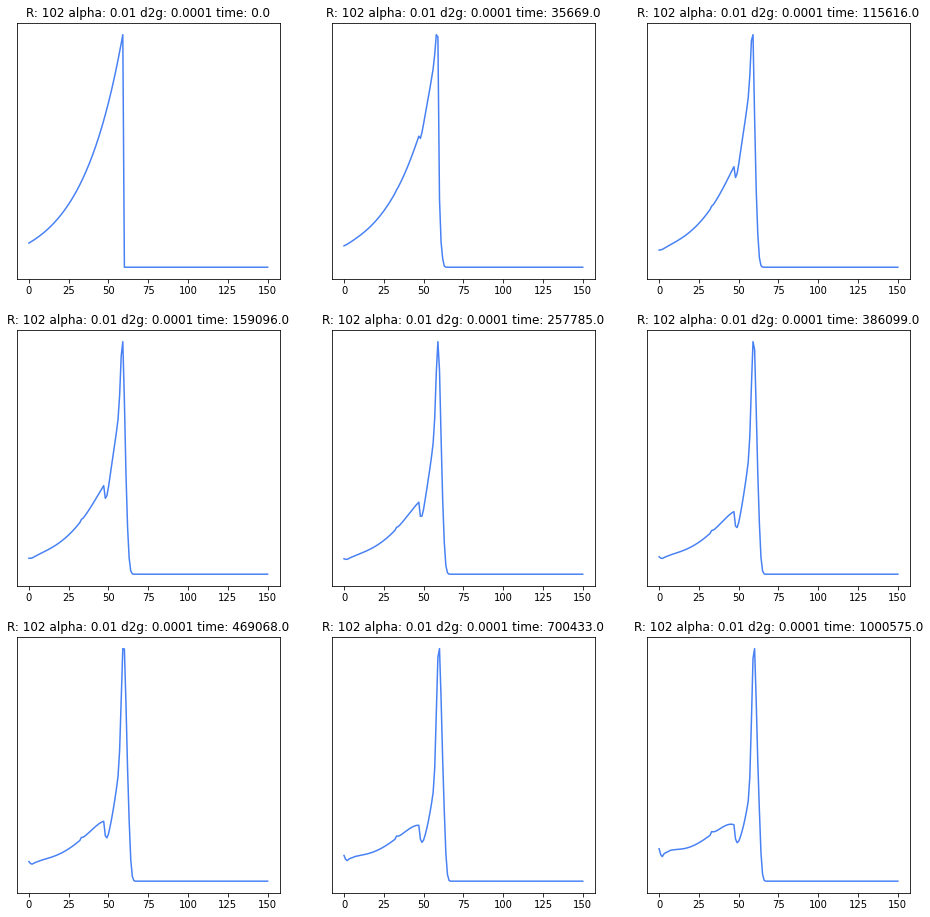

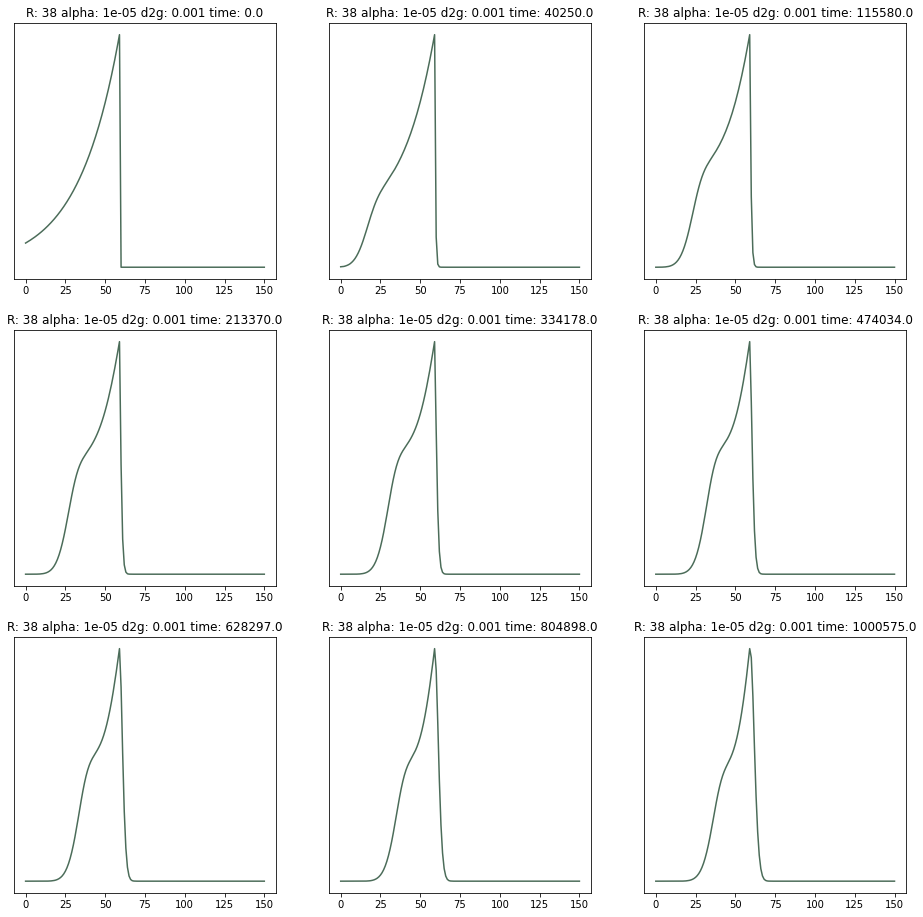

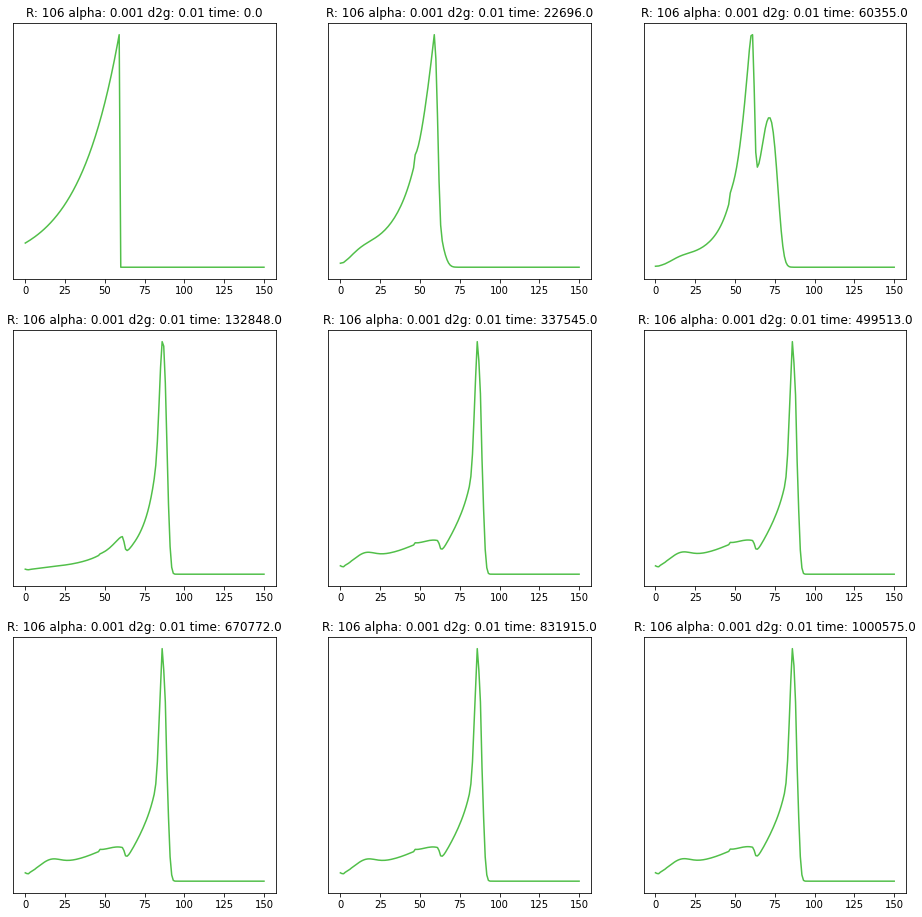

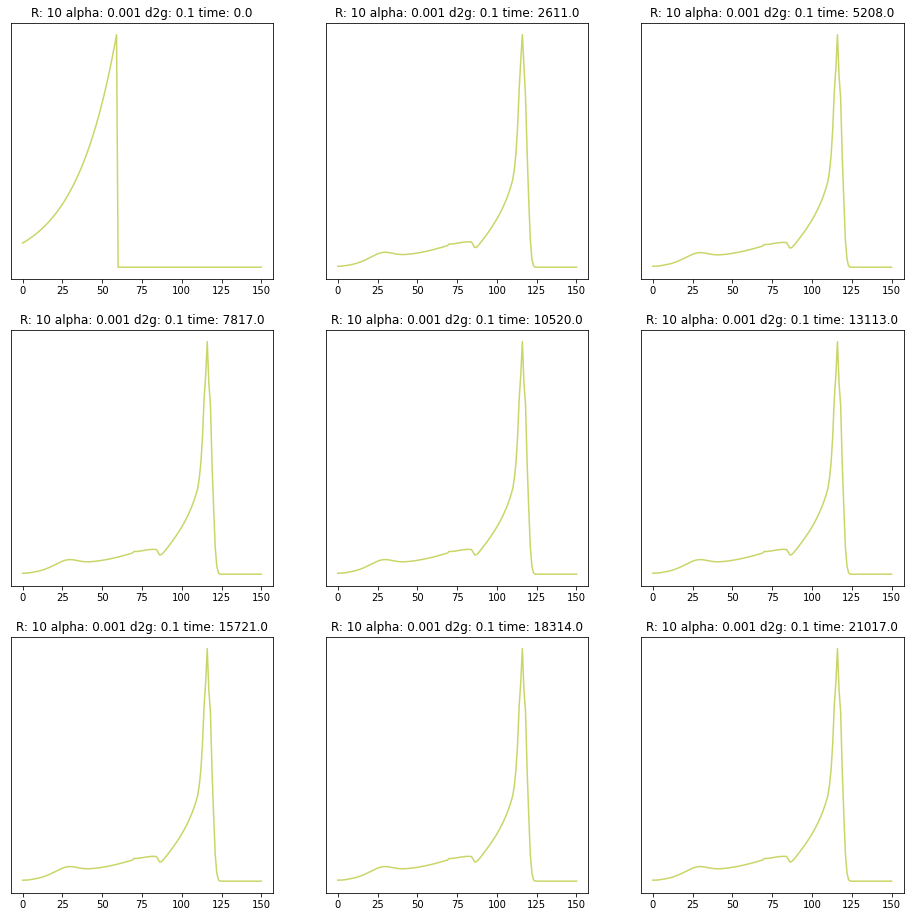

In [8]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import math

root_data_path = "/project/SDS-capstones-kropko21/uva-astronomy/data/dust_coag_data_v1"
data_group = "combined_v1"

model_idxs = np.random.randint(10000, size=4)
models = {}
for idx in model_idxs:
    data_set = str(idx).zfill(5)

    data_dir = f"{root_data_path}/{data_group}/data_{data_set}"

    input_params = None
    # Open and extract the input parameters
    with open(os.path.join(root_data_path, "model_dict_v1.json")) as f:
        model_dict = json.load(f)
        input_dict = model_dict[data_set]
        input_params = [input_dict['R'], input_dict['Mstar'], input_dict['alpha'],input_dict['d2g'], input_dict['sigma'], input_dict['Tgas']]

    try:
        # `rho_dat`: The dust mass density (in g/cm^3) in each particle size/bin at a given snapshot in time. This is the main "output", i.e., the primary result, of any given model.
        rhod = np.loadtxt(os.path.join(data_dir,"rho_d.dat"))
        #if len(rhod) < 10:

        # Replace NaNs with 0s
        rhod = np.nan_to_num(rhod)
        # Replace negative values with 0s
        rhod = np.where(rhod<0, 0, rhod) 

         # `a_grid.dat`: The dust particle size in each "bin" in centimeters.
        a_grid = np.loadtxt(os.path.join(data_dir, 'a_grid.dat'))

        # `time.dat`: The time of each snapshot (in seconds).
        time = np.loadtxt(os.path.join(data_dir, "time.dat"))
    except Exception as e:
        print(f'model {d} skipped')
        import traceback
        print(traceback.print_exc())

    
    
    snapshot_idxs = np.linspace(0, len(rhod)-1, num=9, endpoint=True, retstep=False, dtype=None, axis=0)
    fig, axs = plt.subplots(3, 3, figsize=(16,16))
    color = np.random.rand(3,)
    for idx, s in enumerate(snapshot_idxs):
        s = math.floor(s)
        # Calculate the x,y position for our subplot
        x = math.floor(idx / 3)
        y = idx % 3
        axis = axs[x,y]
        axis.plot(rhod[s], color=color)
        axis.yaxis.set_visible(False)
        axis.set_title(f"R: {round(input_params[0])} alpha: {input_params[2]} d2g: {input_params[3]} time: {round(time[s]/3.154e+7)}")
        try:
            models[dist.model['name']] += 1
        except KeyError:
            models[dist.model['name']] = 1
    fig.show()


print(models)

In [ ]:
#!pip install distfit
from distfit import distfit
dist = distfit(distr='popular', bins=151)
        dist.fit_transform(rhod[s])